# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

city_data = []

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
print("Initializing Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    city_url = url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Collection Complete     ")
print("-----------------------------")

Initializing Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mapiri
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | cayenne
Processing Record 5 of Set 1 | christchurch
Processing Record 6 of Set 1 | zamora
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | alta floresta
Processing Record 9 of Set 1 | verkhniy landekh
Processing Record 10 of Set 1 | agropoli
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | verkhnevilyuysk
Processing Record 14 of Set 1 | comodoro rivadavia
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | north bend
Processing Record 17 of Set 1 | chingirlau
Processing Record 18 of Set 1 | progreso
Processing Record 19 of Set 1 | ambilobe
Processing Record 20 of Set 1 | klaksvik
Processing Record 21 of Set 1 | naze
Processing Record 22 of Set 1 | shakawe
Processing Record

Processing Record 40 of Set 4 | chapais
Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | lavrentiya
Processing Record 43 of Set 4 | lompoc
Processing Record 44 of Set 4 | muli
Processing Record 45 of Set 4 | ormara
Processing Record 46 of Set 4 | zyryanka
Processing Record 47 of Set 4 | salina cruz
Processing Record 48 of Set 4 | yellowknife
Processing Record 49 of Set 4 | abashiri
Processing Record 0 of Set 5 | yar-sale
Processing Record 1 of Set 5 | atar
Processing Record 2 of Set 5 | andarab
City not found. Skipping...
Processing Record 3 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 5 | sterling
Processing Record 5 of Set 5 | havre-saint-pierre
Processing Record 6 of Set 5 | dingle
Processing Record 7 of Set 5 | port hedland
Processing Record 8 of Set 5 | ponta do sol
Processing Record 9 of Set 5 | katsuura
Processing Record 10 of Set 5 | miri
Processing Record 11 of Set 5 | birao
Processing Record 12 of Set 5 | pisco
Proce

Processing Record 32 of Set 8 | bathsheba
Processing Record 33 of Set 8 | belyy yar
Processing Record 34 of Set 8 | tacuarembo
Processing Record 35 of Set 8 | bonfim
Processing Record 36 of Set 8 | codrington
Processing Record 37 of Set 8 | kishtwar
Processing Record 38 of Set 8 | madimba
Processing Record 39 of Set 8 | gat
Processing Record 40 of Set 8 | praia da vitoria
Processing Record 41 of Set 8 | luba
Processing Record 42 of Set 8 | erenhot
Processing Record 43 of Set 8 | sao jose da coroa grande
Processing Record 44 of Set 8 | midlothian
Processing Record 45 of Set 8 | acari
Processing Record 46 of Set 8 | gorontalo
Processing Record 47 of Set 8 | tual
Processing Record 48 of Set 8 | humaita
Processing Record 49 of Set 8 | sao filipe
Processing Record 0 of Set 9 | usinsk
Processing Record 1 of Set 9 | council bluffs
Processing Record 2 of Set 9 | camacha
Processing Record 3 of Set 9 | honningsvag
Processing Record 4 of Set 9 | ciras
City not found. Skipping...
Processing Record

Processing Record 19 of Set 12 | umm lajj
Processing Record 20 of Set 12 | kenai
Processing Record 21 of Set 12 | rogovatoye
Processing Record 22 of Set 12 | tambopata
Processing Record 23 of Set 12 | bonthe
Processing Record 24 of Set 12 | yeppoon
Processing Record 25 of Set 12 | soacha
Processing Record 26 of Set 12 | baykit
Processing Record 27 of Set 12 | vedaranniyam
City not found. Skipping...
Processing Record 28 of Set 12 | kikwit
Processing Record 29 of Set 12 | kiama
Processing Record 30 of Set 12 | broken hill
Processing Record 31 of Set 12 | tayoltita
Processing Record 32 of Set 12 | berlevag
Processing Record 33 of Set 12 | shush
Processing Record 34 of Set 12 | jining
Processing Record 35 of Set 12 | komsomolskiy
Processing Record 36 of Set 12 | kulhudhuffushi
Processing Record 37 of Set 12 | nizhniy tsasuchey
Processing Record 38 of Set 12 | rocha
Processing Record 39 of Set 12 | port augusta
Processing Record 40 of Set 12 | teguldet
Processing Record 41 of Set 12 | prai

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd

""


In [20]:
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Show Record Count
city_data_pd.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [14]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mapiri,-15.25,-68.17,82.27,63,100,1.86,BO,1579619082
1,ushuaia,-54.80,-68.30,55.40,71,75,26.40,AR,1579618861
2,anadyr,64.75,177.48,-22.00,74,0,4.47,RU,1579619082
3,cayenne,4.93,-52.33,82.40,69,75,14.99,GF,1579618919
4,christchurch,-43.53,172.63,63.00,87,100,13.87,NZ,1579618800


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

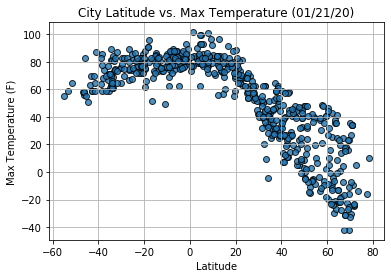

In [16]:
plt.scatter(lats, max_temps,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Humidity Plot

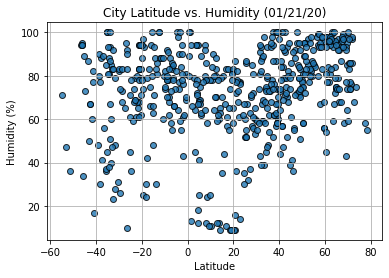

In [17]:
plt.scatter(lats, humidity,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Cloudiness Plot

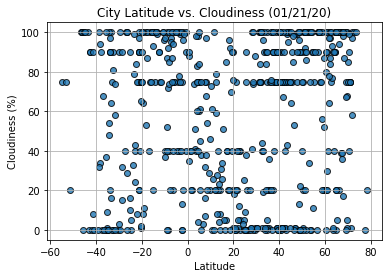

In [18]:
plt.scatter(lats, cloudiness,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Wind Speed Plot

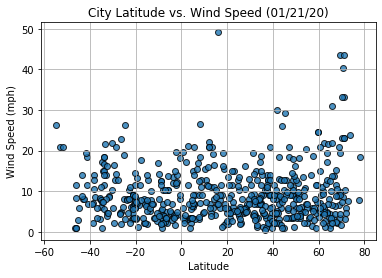

In [19]:
plt.scatter(lats, wind_speed,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()